In [1]:
!pip install datasets pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("dair-ai/emotion")

In [3]:
# See what's inside the dataset
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [4]:
import pandas as pd

# Convert the "train" part to a table
df = pd.DataFrame(dataset["train"])

# Show the first 5 rows
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [5]:
# Map numbers to emotion names
label_names = {
    0: "sadness", 
    1: "joy", 
    2: "love", 
    3: "anger", 
    4: "fear", 
    5: "surprise"
}

# Add a new column "emotion" to the table
df["emotion"] = df["label"].map(label_names)

# Show the updated table
df.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [6]:
# Count how many tweets exist for each emotion
emotion_counts = df["emotion"].value_counts()
print(emotion_counts)

emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [7]:
from transformers import AutoTokenizer, AutoModel
import torch

# 1. Filter only "surprise" (label=5) from your dataset
surprise_data = df[df["label"] == 5]["text"].tolist()  # Get all surprise texts

# 2. Load a pretrained model (e.g., BERT for text embeddings)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# 3. Generate embeddings for real surprise samples
inputs = tokenizer(surprise_data, padding=True, truncation=True, return_tensors="pt", max_length=128)
with torch.no_grad():
    outputs = model(**inputs)
    real_embeddings = outputs.last_hidden_state.mean(dim=1)  # Average pooling

# 4. Save real embeddings (for Step 3)
torch.save(real_embeddings, "real_surprise_embeddings.pt")
print(f"Saved real embeddings for {len(surprise_data)} surprise samples!")


Saved real embeddings for 572 surprise samples!


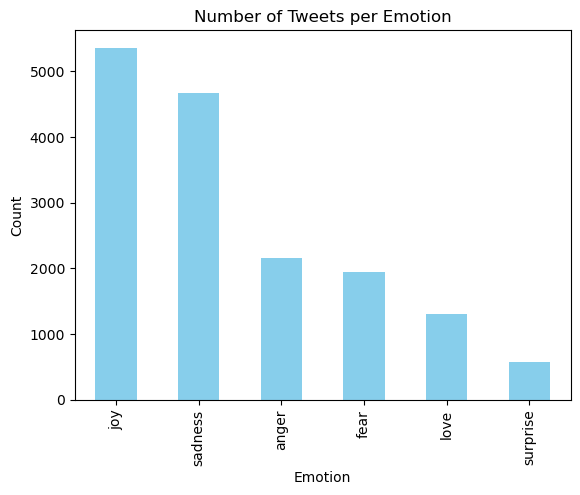

In [8]:
import matplotlib.pyplot as plt

# Create a bar chart
emotion_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Tweets per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()